We investigate the same run/s with all the tools at once.


In [1]:
import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

from q_solve import generate_result
from Schmidt_solve import compute_schmidt_states_new
from Schmidt_solve import compute_schmidt_full
from Schmidt_solve import plot_schmidt_value_time
from VN import plot_VN
from VN import compute_VN_time
from e_spectrum import plot_e_spectrum
from Neff import plot_Neff_schmidt_Neff_tot
from checkup import checkup
from overlap import plot_p_overlap_graph
from similarities import probs_schmidt_in_energy_eigenstates
from similarities import cos_similarity_btw_s1_s2_plot
from similarities import metric_similarity_btw_s1_s2_plot
from Interference import interference_plot

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from PIL import Image







In [2]:

def update_plot(frames):
    # Clear previous plot
    plt.clf()
    frames = frames+1
    state = compute_schmidt_full(result,frames,1)
    state2 = compute_schmidt_full(result,frames,2)
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff);
    plt.plot(eigenenergies_total,energy_coeff2);
    plt.title(f"Plot of the probability that Schmidt1 and 2 are in the energy eigenstates for EI={EI} and w={w}")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.legend(["Schmidt1","Schmidt2"])
    plt.ylim(0, 0.25)

def update_plot1(frames):
    # Clear previous plot
    plt.clf()
    frames = frames+1
    state = compute_schmidt_full(result,frames,1)
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff);
    plt.title(f"Plot of the probability that Schmidt1 be in energy eigenstates for EI={EI} and w={w}")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.legend(["Schmidt1"])
    plt.ylim(0, 0.25)
    
def update_plot2(frames):
    # Clear previous plot
    frames = frames+1
    plt.clf()
    state2 = compute_schmidt_full(result,frames,2)
    energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    plt.plot(eigenenergies_total,energy_coeff2);
    plt.title(f"Plot of the probability that Schmidt 2 be in an energy eigenstates for EI={EI} and w={w}")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.legend(["Schmidt2"])
    plt.ylim(0, 0.25)

def make_gif_distribs1s2(EI,w):#H_total,result,EI

    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot, frames=99, interval=100)

    # Save the animation as a GIF
    ani.save(f'Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')
    plt.close()

def make_gif_distribs1(EI,w):
    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot1, frames=99, interval=100)
    
    # Save the animation as a GIF
    ani.save(f'Gifs/distrib_schmidt1_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')

def make_gif_distribs2(EI,w):
    # Create a figure
    fig = plt.figure(figsize=(10, 5))
    
    # Create the animation
    ani = FuncAnimation(fig, update_plot2, frames=99, interval=100)
    
    # Save the animation as a GIF
    ani.save(f'Gifs/distrib_schmidt2_over_energy_spectrum_EI_{EI}_w_{w}.gif', writer='pillow')


In [3]:

def all_at_once(result,H_total,tlist,EI,w):
    eigenenergies_total, eigenstates_total = H_total.eigenstates()

    #note: could make a lot more efficient by redefinig the functions to take things calculated before, to avoid doing the same thing multiple times

    #=============make gifs
    make_gif_distribs1s2(EI,w)

    # Replace 'path_to_your_gif.gif' with the path to your GIF file
    gif_path = f'/Users/maringirard/Dev/Quantum_Branching/Gifs/distrib_schmidt1_2_over_energy_spectrum_EI_{EI}_w_{w}.gif'

    # Create HTML code to display the GIF
    html_code = f'<img src="{gif_path}">'

    # Display the GIF
    display(HTML(html_code))

    #=============make spectrum
    plot_e_spectrum(H_total,result,EI)

    #=============make Neff

    plot_Neff_schmidt_Neff_tot(H_total,result,tlist,EI)

    #=============make schmidt value over time

    plot_schmidt_value_time(result,tlist)
    
    #=============make VN
    plot_VN(result,tlist)

    #=============make overlap
    plot_p_overlap_graph(tlist,result,H_total,w,EI)

    #=============make interference
    interference_plot(result,H_total,tlist,start_num=1005,end_num=1010)

    #=============make similarities
    s1_list,s2_list=probs_schmidt_in_energy_eigenstates(result,eigenenergies_total,eigenstates_total,tlist,EI,w)

    cos_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)
    
    metric_similarity_btw_s1_s2_plot(s1_list,s2_list,tlist)
    
    time_cos_similarity_plot(result,tlist)


    # Data for plotting
    x = [1, 2, 3, 4, 5]
    y1 = [5, 7, 3, 8, 4]
    y2 = [3, 4, 6, 2, 9]
    y3 = [8, 2, 5, 1, 6]
    y4 = [4, 6, 7, 2, 1]

    # Plot the results
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plot data on each subplot
    axs[0, 0].plot(x, y1, label='Data 1')
    axs[0, 0].set_title('Plot 1')
    axs[0, 0].set_xlabel('X-axis')
    axs[0, 0].set_ylabel('Y-axis')
    axs[0, 0].legend()

    axs[0, 1].plot(x, y2, label='Data 2')
    axs[0, 1].set_title('Plot 2')
    axs[0, 1].set_xlabel('X-axis')
    axs[0, 1].set_ylabel('Y-axis')
    axs[0, 1].legend()

    axs[1, 0].plot(x, y3, label='Data 3')
    axs[1, 0].set_title('Plot 3')
    axs[1, 0].set_xlabel('X-axis')
    axs[1, 0].set_ylabel('Y-axis')
    axs[1, 0].legend()

    axs[1, 1].plot(x, y4, label='Data 4')
    axs[1, 1].set_title('Plot 4')
    axs[1, 1].set_xlabel('X-axis')
    axs[1, 1].set_ylabel('Y-axis')
    axs[1, 1].legend()

    # Set common title for all subplots
    plt.suptitle('Multiple Plots')

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

In [4]:
d1, d2 = 10, 200
E_spacing = 1.0
Int_strength = 0.03
EI=Int_strength
tmax= 10
ind_nb = 100
w=0.3
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0) 
eigenenergies_total, eigenstates_total = H_total.eigenstates()    

Neff_total is 13.668960428696288


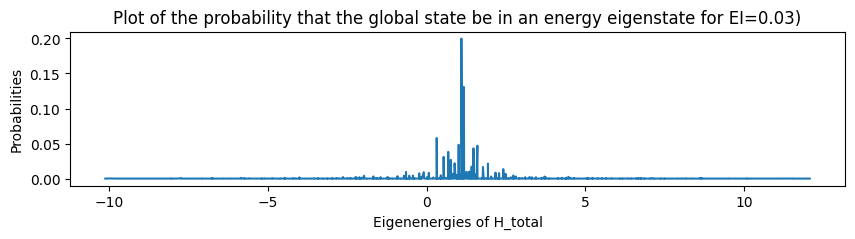

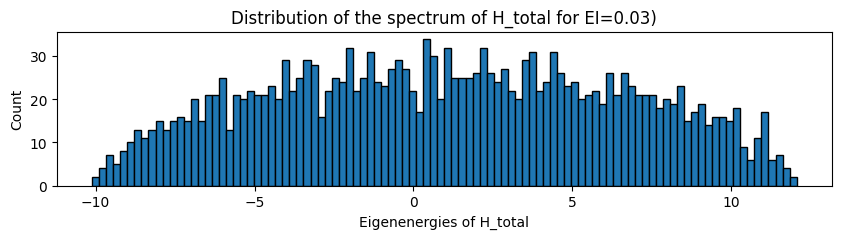

/Users/maringirard/Dev/Quantum_Branching/Neff.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  coef3.append(1/np.sum(p2__))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the im

1005
1006
1007
1008
1009
1010


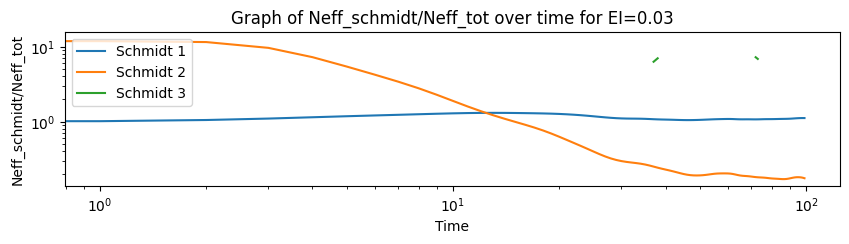

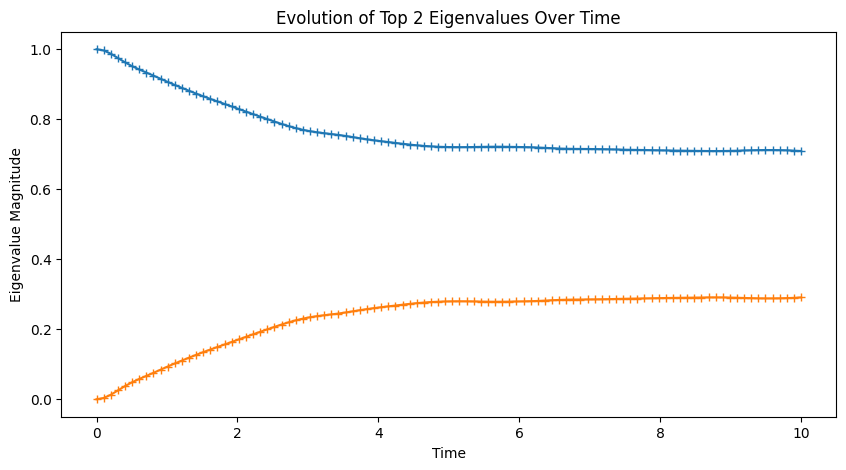

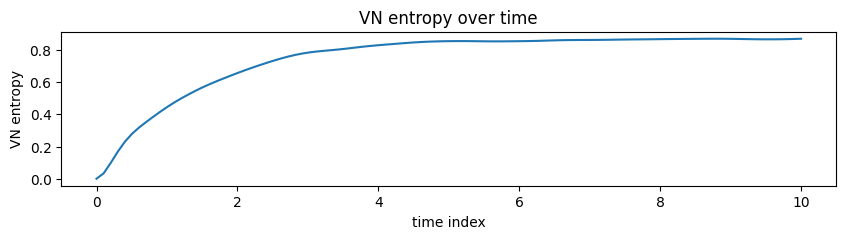

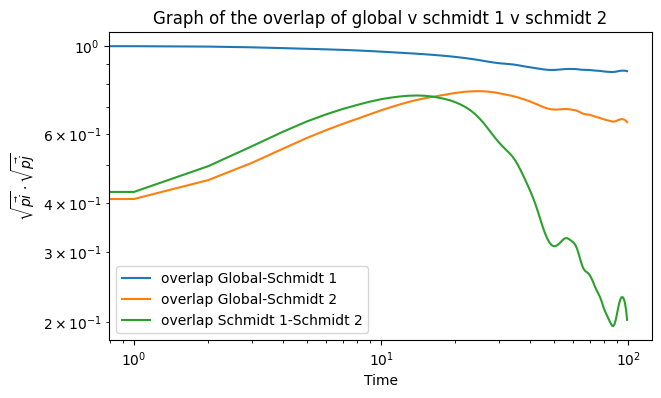

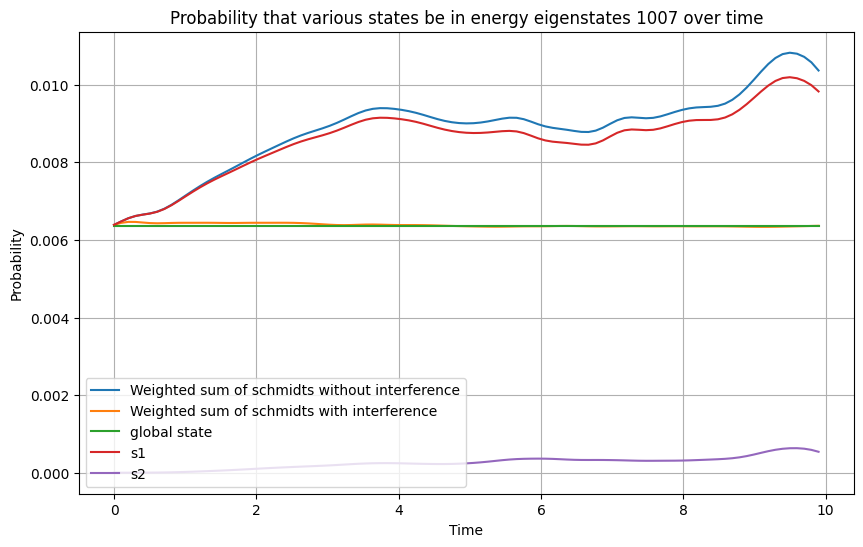

NameError: name 'time_cos_similarity_plot' is not defined

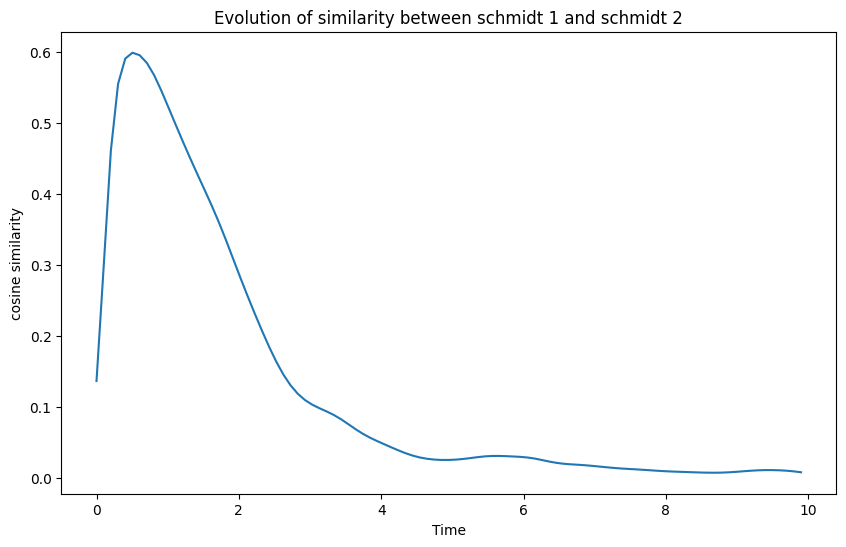

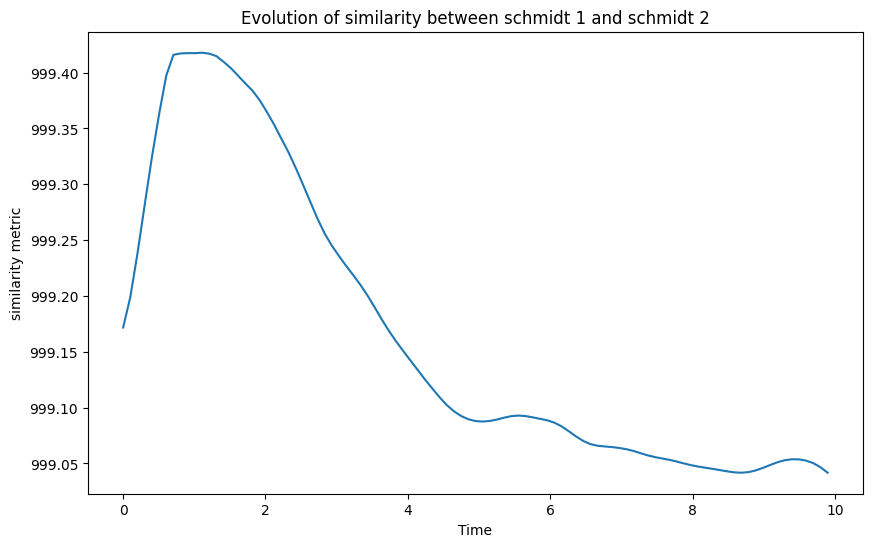

In [5]:
all_at_once(result,H_total,tlist,EI,w)